# NLP With Hotel Review

## Table of Contents
1. [Introduction](#Introduction)
   - [Data Dictionary](#Data-dictionary)
2. [Exploratory Data Analysis](#Exploratory-data-analysis)
   - [Statistical Analysis](#Basic-Statistical-analysis)
   - [Visualizations](#Visualizations)
   - [Data Cleaning](#Data-cleaning)
3. [Preprocessing](#Preprocessing)
   - [Train/Test Split](#Train-test-split)
   - [Text Transformation](#Text-transformation)
4. [Modelling](#Modelling)
   - [Logistic Regression](#Logistic-regression)
   - [Pipeline with PCA and Decision Tree Classifier](#Pipeline)
5. [Evaluation](#Evaluation)
   - [Confusion Matrix](#Confusion-matrix)
   - [Precision and Recall](#Precision-and-recall)
6. [Conclusion](#Conclusion)


# Introduction
-In this project we are tasked with helping Hotel Management Inc. better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. 

-For this analysis, we are provided with a large data set consisting of hotel reviews (text fields for positive and negative comments) and details about the stay (hotel location, time & length of stay, etc). 

-Ourtarget column of interest is Reviewer_Score that encodes positive sentiment as 1 and negative as 0.
# Data-dictionary

| Column Name                              | Data Type      | Description                                                           |
| :-------------------------------------- | :------------  | :--------------------------------------------------------------------- |
| `Unnamed: 0`                             | Integer        | An autogenerated index or identifier for each review.                 |
| `Additional_Number_of_Scoring`           | Integer        | The number of additional scoring or reviews that a hotel has received.|
| `Average_Score`                          | Float          | The average score of the hotel from all reviewers, likely on a scale from 1 to 10.|
| `Review_Total_Negative_Word_Counts`      | Integer        | The total count of negative words used in each review.                |
| `Total_Number_of_Reviews`                | Integer        | The total number of reviews that the hotel has received.              |
| `Review_Total_Positive_Word_Counts`      | Integer        | The total count of positive words used in each review.                |
| `Total_Number_of_Reviews_Reviewer_Has_Given` | Integer    | The total number of reviews given by the reviewer across all hotels.  |
| `Reviewer_Score`                         | Float          | The score given to the hotel by the specific reviewer.                |
| `Days_Since_Review`                      | Integer        | The number of days since the review was written at the time the data was collected.|
| `Latitude`                               | Float          | The latitude of the hotel's location.                                 |
| `Longitude`                              | Float          | The longitude of the hotel's location.                                |
| `Day`                                    | Integer        | The day of the month the review was written.                          |
| `Month`                                  | Integer        | The month the review was written.                                    |
| `Year`                                   | Integer        | The year the review was written.                                     |
| `Reviewer_Nationality_Australia`         | Integer/Binary | Indicator whether the reviewer is from Australia (1 if true, 0 otherwise).|
| `Reviewer_Nationality_Ireland`           | Integer/Binary | Indicator whether the reviewer is from Ireland (1 if true, 0 otherwise).|
| `Reviewer_Nationality_UAE`               | Integer/Binary | Indicator whether the reviewer is from the UAE (1 if true, 0 otherwise).|
| `Reviewer_Nationality_UK`                | Integer/Binary | Indicator whether the reviewer is from the UK (1 if true, 0 otherwise). |
| `Reviewer_Nationality_USA`               | Integer/Binary | Indicator whether the reviewer is from the USA (1 if true, 0 otherwise).|
| `Reviewer_Nationality_Other`             | Integer/Binary | Indicator whether the reviewer is from a country not listed in this dataset (1 if true, 0 otherwise).|
| `Hotel_Address_Amsterdam`                | Integer/Binary | Indicator whether the hotel is in Amsterdam (1 if true, 0 otherwise). |
| `Hotel_Address_Barcelona`                | Integer/Binary | Indicator whether the hotel is in Barcelona (1 if true, 0 otherwise). |
| `Hotel_Address_London`                   | Integer/Binary | Indicator whether the hotel is in London (1 if true, 0 otherwise).    |
| `Hotel_Address_Milan`                    | Integer/Binary | Indicator whether the hotel is in Milan (1 if true, 0 otherwise).     |
| `Hotel_Address_Paris`                    | Integer/Binary | Indicator whether the hotel is in Paris (1 if true, 0 otherwise).     |
| `Hotel_Address_Vienna`                   | Integer/Binary | Indicator whether the hotel is in Vienna (1 if true, 0 otherwise).    |
| `Leisure_Trip`                           | Integer/Binary | Indicator whether the stay was categorized as a leisure trip (1 if true, 0 otherwise).|
| `Nights_Stayed`                          | Integer        | The number of nights the reviewer stayed at the hotel.                |


# Exploratory-data-analysis
We will begin with some Exploratory Data Analysis (EDA), and then move into data processing, modelling, and iteration over model improvements.

First, let's load the data and understand what we are working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Hotel_Reviews.csv')

In [3]:
df.shape

(515738, 30)

Lets have a look at head of dataframe and columns: 

In [4]:
pd.set_option('display.max_columns', None)  # To display all columns
df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


Lets drop the unnamed column 

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

# Basic Statistical analysis
We run a statistical summary (df.describe()) of the dataset to get an overview of the distribution, count, mean, standard deviation, and quartile ranges of the numerical columns.

In [7]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,15.680221,6.486660,2016.120761,0.042048,0.028749,0.019845,0.475524,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,8.864491,3.351779,0.687567,0.200700,0.167101,0.139469,0.499401,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


For modeling, the following steps are suggested:

**The nationality of reviewers** could be an interesting feature to include in our model as it may influence expectations and ratings.

**Hotel location (City)** could be a significant feature, as ratings may vary by city due to differences in general service quality, cost of living, etc.

**The length of the reviews** could be a significant feature, as guests who were more dissatisfied may have written more to express their complaints.

**Length of stay and the purpose of the trip (leisure/business)** could be significant features. For example, business travelers might be more concerned with the availability and speed of Wi-Fi, while leisure travelers might care more about recreational facilities.

**Reviewer Nationality:** Most of the reviews seem to come from the UK, with some from the USA and Australia. However, there is a significant chunk (around 36%) of reviewers whose nationality falls under 'Other'. This is important as different nationalities may have different expectations and standards, affecting their review scores.

# Visualizations

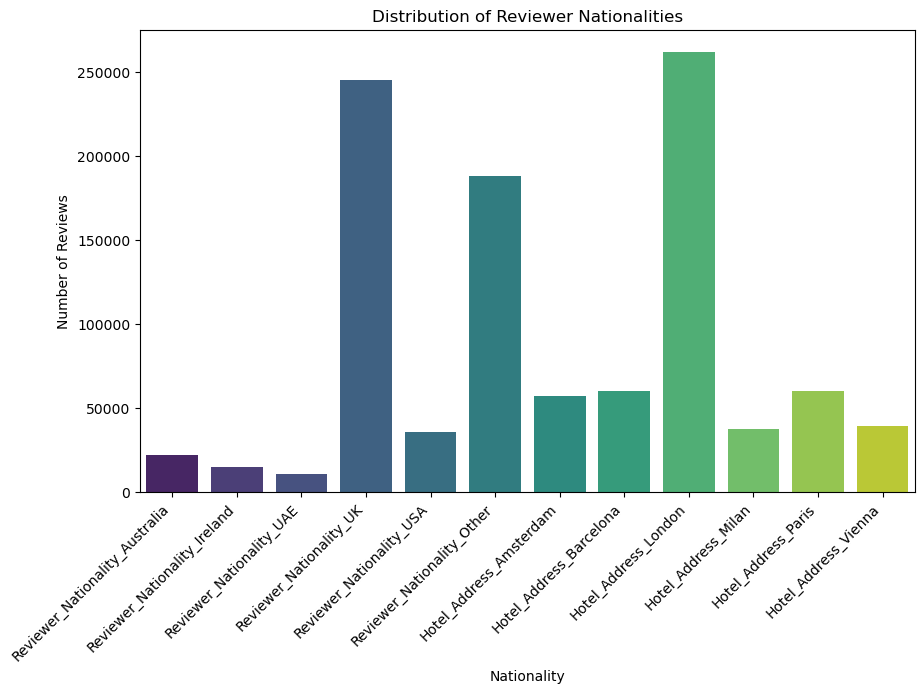

In [8]:
nationalities = [
    'Reviewer_Nationality_Australia',
    'Reviewer_Nationality_Ireland',
    'Reviewer_Nationality_UAE',
    'Reviewer_Nationality_UK',
    'Reviewer_Nationality_USA',
    'Reviewer_Nationality_Other',
    'Hotel_Address_Amsterdam',
    'Hotel_Address_Barcelona',
    'Hotel_Address_London',
    'Hotel_Address_Milan',
    'Hotel_Address_Paris',
    'Hotel_Address_Vienna'
]


# Calculate the sum for each nationality
nationality_counts = df[nationalities].sum()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')

plt.title('Distribution of Reviewer Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Adjusting the positions of x-tick labels
plt.xticks(range(len(nationality_counts.index)), nationality_counts.index, rotation=45, ha="right")

plt.show()


**Reviews:** The 'Review_Total_Positive_Word_Counts' and 'Review_Total_Negative_Word_Counts' fields can provide insightful information. We can see that on average, positive reviews tend to contain fewer words than negative ones. This could indicate that guests who had negative experiences felt more inclined to explain in detail what went wrong during their stay.

In [9]:
df.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

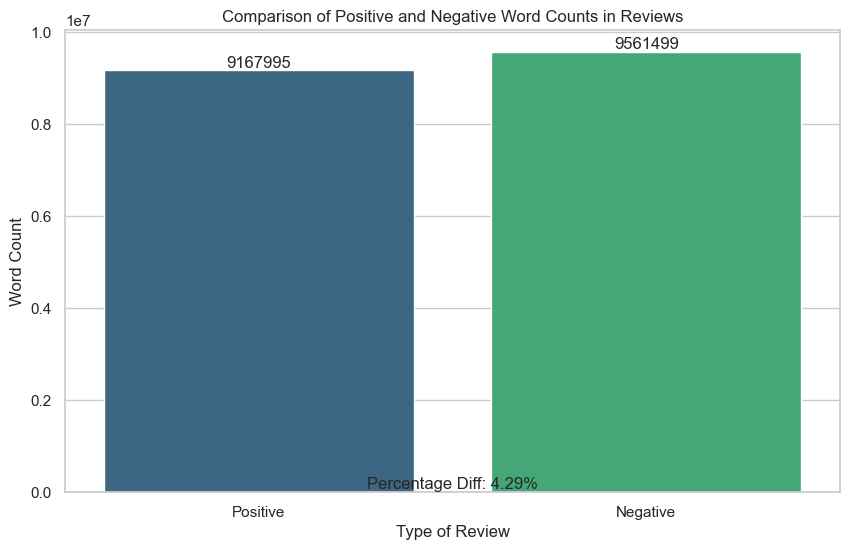

In [10]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

# Create a figure with a size of 10x6 inches.
plt.figure(figsize=(10, 6))

# Calculate the sum of positive and negative word counts from the DataFrame 'df'.
positive_word_counts = df['Review_Total_Positive_Word_Counts'].sum()
negative_word_counts = df['Review_Total_Negative_Word_Counts'].sum()

# Create a bar plot to compare positive and negative word counts.
sns.barplot(x=['Positive', 'Negative'], y=[positive_word_counts, negative_word_counts], palette='viridis')

# Calculate the average positive and negative word counts.
average_positive_word_count = df['Review_Total_Positive_Word_Counts'].mean()
average_negative_word_count = df['Review_Total_Negative_Word_Counts'].mean()

# Calculate the percentage difference between the average negative and average positive word counts.
percentage_difference = ((average_negative_word_count - average_positive_word_count) / average_positive_word_count) * 100

# Add a text annotation for the percentage difference at the top of the plot.
plt.text(0.5, max(average_positive_word_count, average_negative_word_count) + 10,
         f'Percentage Diff: {percentage_difference:.2f}%', ha='center', va='bottom')

# Set plot details.
plt.title('Comparison of Positive and Negative Word Counts in Reviews')
plt.xlabel('Type of Review')
plt.ylabel('Word Count')

# Display the values on top of the bars.
for index, value in enumerate([positive_word_counts, negative_word_counts]):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot.
plt.show()


**Hotel Locations:** A large proportion of the hotels in the dataset are located in London. The other locations have more or less similar numbers of hotels, with Vienna and Milan being the least. The location of a hotel might significantly influence the rating it receives. For example, hotels in more popular or metropolitan cities might receive higher ratings due to better facilities, location convenience, etc.

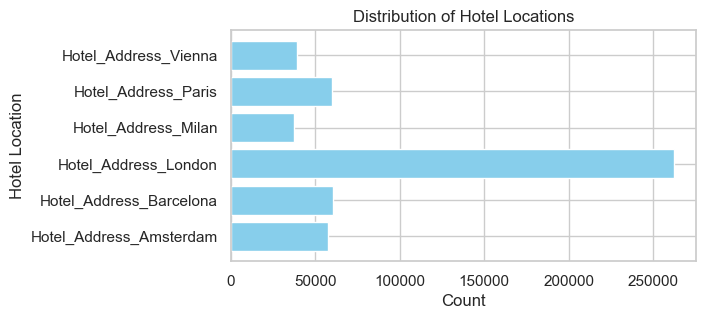

In [11]:
import matplotlib.pyplot as plt

# calculate the sum for each location
hotel_counts = df[['Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona', 'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris', 'Hotel_Address_Vienna']].sum()

# convert the series to dataframe and reset index
hotel_counts_df = hotel_counts.reset_index()

# renaming the columns
hotel_counts_df.columns = ['Hotel_Location', 'Count']

# plot the bar graph
plt.figure(figsize=(6, 3))
plt.barh(hotel_counts_df['Hotel_Location'], hotel_counts_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Hotel Location')
plt.title('Distribution of Hotel Locations')
plt.show()


**Leisure Trips & Night stayed :** 

Length of stay and the purpose of the trip (leisure/business):
Leisure_Trip: Mean 0.810, Std 0.392
Nights_Stayed: Mean 2.362, Std 1.647, Max 31
The majority of the trips are for leisure (81%), and the average stay is around 2.36 nights. Specific preferences between business and leisure travelers can be captured by these features.

In [12]:
 df['Leisure_Trip'].value_counts()


1    417778
0     97960
Name: Leisure_Trip, dtype: int64

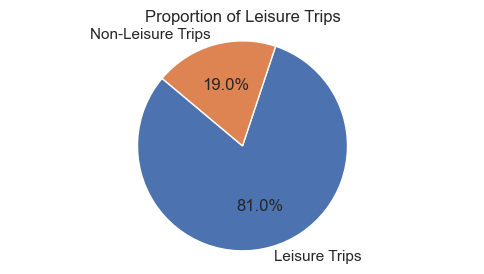

In [13]:
import matplotlib.pyplot as plt

# Count the leisure and non-leisure trips
leisure_counts = df['Leisure_Trip'].value_counts()

# Create labels
labels = 'Leisure Trips', 'Non-Leisure Trips'

# Create pie chart
plt.figure(figsize=(6, 3))
plt.pie(leisure_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Leisure Trips')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Length of Stay: The majority of guests stay for a short period (mean = 2.36 nights), with a high standard deviation (1.64 nights), showing a wide variation in the lengths of stay.

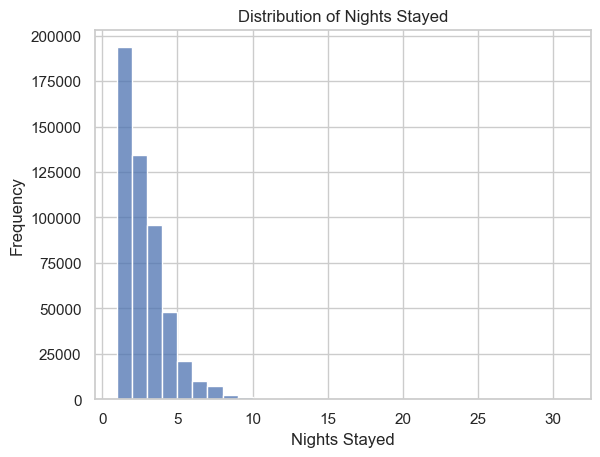

In [14]:
sns.histplot(df['Nights_Stayed'], bins=30)
plt.title('Distribution of Nights Stayed')
plt.xlabel('Nights Stayed')
plt.ylabel('Frequency')
plt.show()


# Data cleaning

Lets check if we have missing values?

In [15]:
df.isna().sum()

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

what about duplicated rows?

In [16]:
df.duplicated().sum()

539

In [17]:
df = df.drop_duplicates()


data seems cleaned , lets check categorical_columns

**Categorial Columns:**

Based on the assignment requirements and the modeling techniques we'll be using (logistic regression and decision tree classifier), we should encode the categorical variables, including the City column, before proceeding to the modeling stage.

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)


Index(['Negative_Review', 'Positive_Review'], dtype='object')


it seems that all the categorial columns were already encoded , now the categorical columns  include 'Negative_Review', 'Positive_Review'
The text columns 'Negative_Review' and 'Positive_Review' will be handled differently (via text processing, tokenization, and vectorization)

# Preprocessing

Preprocessing
Next, the text data needs to be processed for modelling.

Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

What tokenizer and text cleaning steps do you include?

**Tokenizer and Text Cleaning Steps: I used the CountVectorizer with the regular expression token_pattern = r'\b[A-Za-z_][A-Za-z_]+\b', stop_words="english",So the pattern will match any sequence of letters and underscores that starts and ends at a word boundary and consists of one or more characters. Numbers and other special characters are not included in the pattern, so they won't be matched.**

The CountVectorizer also converts characters to lowercase and removes punctuation by default.


Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.


**Maximize the Number of Features at 500: You've set the max_features parameter to 500, which means that only the top 5000 most frequent terms will be kept in the vocabulary.**

**I add the min_df parameter to CountVectorizer, setting it to 10, to ignore terms that have appeared in fewer than 10 documents**

**Split the Data:** Before working with the text data, we will need to split the entire dataset into training and test sets. You can do this by separating your features (including positive and negative reviews) from the target variable and using train_test_split.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


In [20]:
print(df.columns)


Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')


# Text transformation

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

# Initialize the vectorizer for positive reviews
pos_vectorizer = CountVectorizer(token_pattern = r'\b[A-Za-z_][A-Za-z_]+\b', stop_words="english",max_features=500,min_df=10)

# Fit and transform the positive reviews
pos_reviews = pos_vectorizer.fit_transform(df['Positive_Review'])

# Convert to DataFrame and add the prefix manually for positive reviews
pos_reviews_df = pd.DataFrame(pos_reviews.toarray(), columns=[f'pos_{feature}' for feature in pos_vectorizer.get_feature_names_out()])

# Initialize the vectorizer for negative reviews
neg_vectorizer = CountVectorizer(token_pattern = r'\b[A-Za-z_][A-Za-z_]+\b',stop_words="english", max_features=500,min_df=10)

# Fit and transform the negative reviews
neg_reviews = neg_vectorizer.fit_transform(df['Negative_Review'])

# Convert to DataFrame and add the prefix manually for negative reviews
neg_reviews_df = pd.DataFrame(neg_reviews.toarray(), columns=[f'neg_{feature}' for feature in neg_vectorizer.get_feature_names_out()])

# Drop the original review columns
df.drop(['Positive_Review', 'Negative_Review'], axis=1,inplace=True)


# Reset the index of the original DataFrame
df.reset_index(drop=True, inplace=True)


# Concatenate the positive and negative review vectors with the original data
df = pd.concat([pos_reviews_df, neg_reviews_df, df], axis=1)


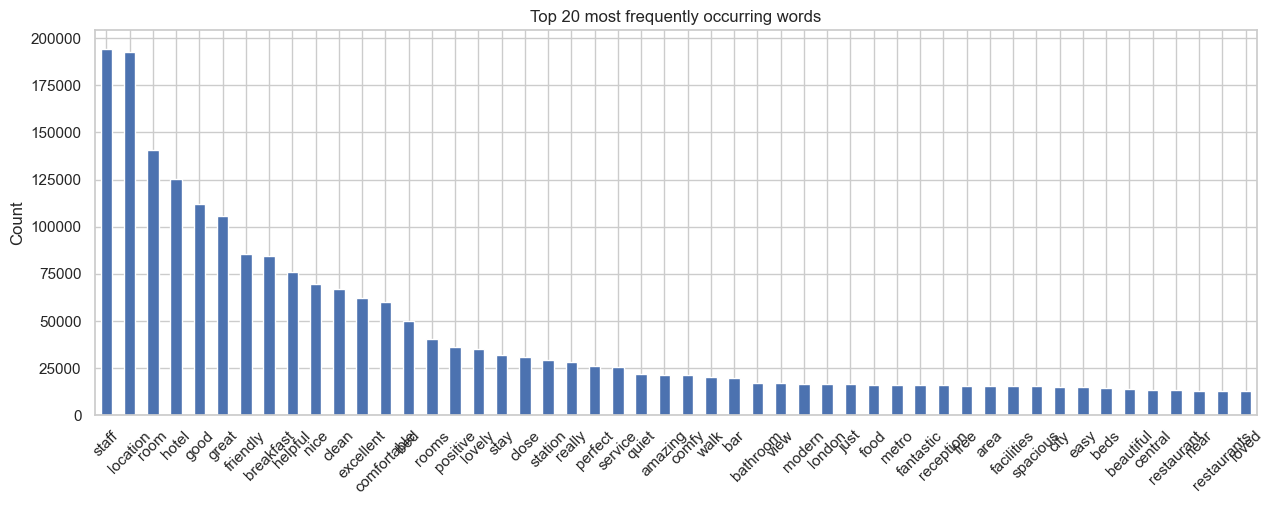

In [22]:
pos_reviews_df = pd.DataFrame( {"counts": pos_reviews.toarray().sum(axis=0)}
, index=pos_vectorizer.get_feature_names_out()).sort_values("counts", ascending=False)
pos_reviews_df.head(50).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
df.isna().sum()

pos_able                0
pos_absolutely          0
pos_access              0
pos_accommodating       0
pos_afternoon           0
                       ..
Hotel_Address_Milan     0
Hotel_Address_Paris     0
Hotel_Address_Vienna    0
Leisure_Trip            0
Nights_Stayed           0
Length: 1027, dtype: int64

# Train test split

### Spliting the data

In [23]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop('Reviewer_Score', axis=1)
y = df['Reviewer_Score']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)


# Modelling
As the data is now ready for modelling, we will be creating two separate models with optimization and evaluation of each.

Fit a logistic regression model on the data and analyze the test and train accuracy. Find the top 20 words from the positive reviews that are most predictive of a positive sentiment (Reviewer_Score = 1). Similarly, find the top 20 words from the negative reviews that are most predictive of a negative sentiment (Reviewer_Score = 0). What actionable insights can you draw from these?

Initialize the Logistic Regression Model:

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg_model = LogisticRegression(solver='saga', penalty='l2', tol=0.01, max_iter=1000, n_jobs=-1)

# Logistic-regression

**Fit a logistic regression model on the data and analyze the test and train accuracy**


In [25]:
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga', tol=0.01)

**Evaluate the Model:**

In [26]:
Train_Accurency = log_reg_model.score(X_train,y_train)
Test_Accurency = log_reg_model.score(X_test, y_test)

print("Training Accuracy:", Train_Accurency)
print("Test Accuracy:", Test_Accurency)

Training Accuracy: 0.7090224888938492
Test Accuracy: 0.7082104037267081


The logistic regression model has been trained and evaluated, showing a training accuracy of approximately 70.90% and a test accuracy of approximately 70.82%. This means the model is performing similarly on both the training and test sets, which is a good sign.

**Interpreting the Model:**
Investigating the coefficients to understand what features are most important in your predictions. This might include looking at the largest positive and negative coefficients to see what words or features are most strongly associated with each class.m

### Note for Myself:

Get the coefficients for positive and negative words
pos_coefficients = log_reg_model.coef_[0][:len(pos_vectorizer.get_feature_names_out())]
neg_coefficients = log_reg_model.coef_[0][len(pos_vectorizer.get_feature_names_out()):]

Here's the structure of the code and why it's using pos_vectorizer to split the coefficients:

Positive Reviews: pos_vectorizer is fitted and transformed on the positive reviews, resulting in a set of features specific to positive reviews. It understands only the positive vocabulary.

Negative Reviews: neg_vectorizer is fitted and transformed on the negative reviews, resulting in another set of features specific to negative reviews. It understands only the negative vocabulary.

Concatenation of Features: These two sets of features are concatenated into a single data frame. The features related to positive reviews come first, followed by those related to negative reviews.

Model Training: A model (e.g., logistic regression) is trained on this concatenated set of features.

Coefficient Extraction: The coefficients from the logistic regression model correspond to the features in the same order as they were concatenated. So the first N coefficients, where N is the number of positive features, correspond to the positive reviews, and the remaining coefficients correspond to the negative reviews.

So when this code is executed:

python
Copy code
pos_coefficients = log_reg_model.coef_[0][:len(pos_vectorizer.get_feature_names_out())]
neg_coefficients = log_reg_model.coef_[0][len(pos_vectorizer.get_feature_names_out()):]
pos_coefficients contains the coefficients for the positive features because they correspond to the first N coefficients in the model.
neg_coefficients contains the coefficients for the negative features because they correspond to the remaining coefficients in the model.
The code uses pos_vectorizer.get_feature_names_out() to determine the split point in the coefficients, not to actually get the feature names for the negative reviews. The length of the positive feature names is used as a separator between the positive and negative parts of the coefficients.

In [27]:
log_reg_model.coef_.shape

(1, 1026)

In [30]:
# Get the coefficients for positive and negative words
pos_coefficients = log_reg_model.coef_[0][:len(pos_vectorizer.get_feature_names_out())]
neg_coefficients = log_reg_model.coef_[0][len(pos_vectorizer.get_feature_names_out()):]

# Map the coefficients back to the words for positive reviews
pos_words_with_coefficients = list(zip(pos_vectorizer.get_feature_names_out(), pos_coefficients))
pos_words_with_coefficients.sort(key=lambda x: x[1], reverse=True)
top_20_positive_words = pos_words_with_coefficients[:20]

# Map the coefficients back to the words for negative reviews
neg_words_with_coefficients = list(zip(neg_vectorizer.get_feature_names_out(), neg_coefficients))
neg_words_with_coefficients.sort(key=lambda x: x[1], reverse=False) # Note that we want the smallest values for negative words
top_20_negative_words = neg_words_with_coefficients[:20]

# Print the results
print("Top 20 words predictive of positive sentiment:")
for word, coef in top_20_positive_words:
    print(word, coef)

print("\nTop 20 words predictive of negative sentiment:")
for word, coef in top_20_negative_words:
    print(word, coef)


Top 20 words predictive of positive sentiment:
staff 0.002332840175773898
great 0.0014370280025397977
excellent 0.0011125002368088705
friendly 0.0009940544755379353
hotel 0.0009925428232283417
helpful 0.0009427037877438388
room 0.000686209507280978
lovely 0.0006162709270229453
comfortable 0.0005958130303528434
amazing 0.0005532263738099283
stay 0.00047524186896009577
perfect 0.0004681071206289994
service 0.0004144719330682212
clean 0.000394073504759382
fantastic 0.00037082553734694166
rooms 0.0003544159275944875
beautiful 0.00032719577374516984
really 0.0003206477214454457
loved 0.0002984510576891281
bed 0.00024945212870465235

Top 20 words predictive of negative sentiment:
room -0.002545819419619697
small -0.0011242601839476778
rooms -0.0007038107097787507
staff -0.0006621407310586644
hotel -0.0005584206194948489
bed -0.0005281814122368256
bathroom -0.00046987735337234067
poor -0.00046890023245231007
old -0.00035175951428654325
noisy -0.000298089498316905
shower -0.0002405749269962492

/var/folders/0t/7qv1vmrs6l10yk4t5m_54jnr0000gn/T/ipykernel_5546/3546805628.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(positive_words, rotation=90)
/var/folders/0t/7qv1vmrs6l10yk4t5m_54jnr0000gn/T/ipykernel_5546/3546805628.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(negative_words, rotation=90)


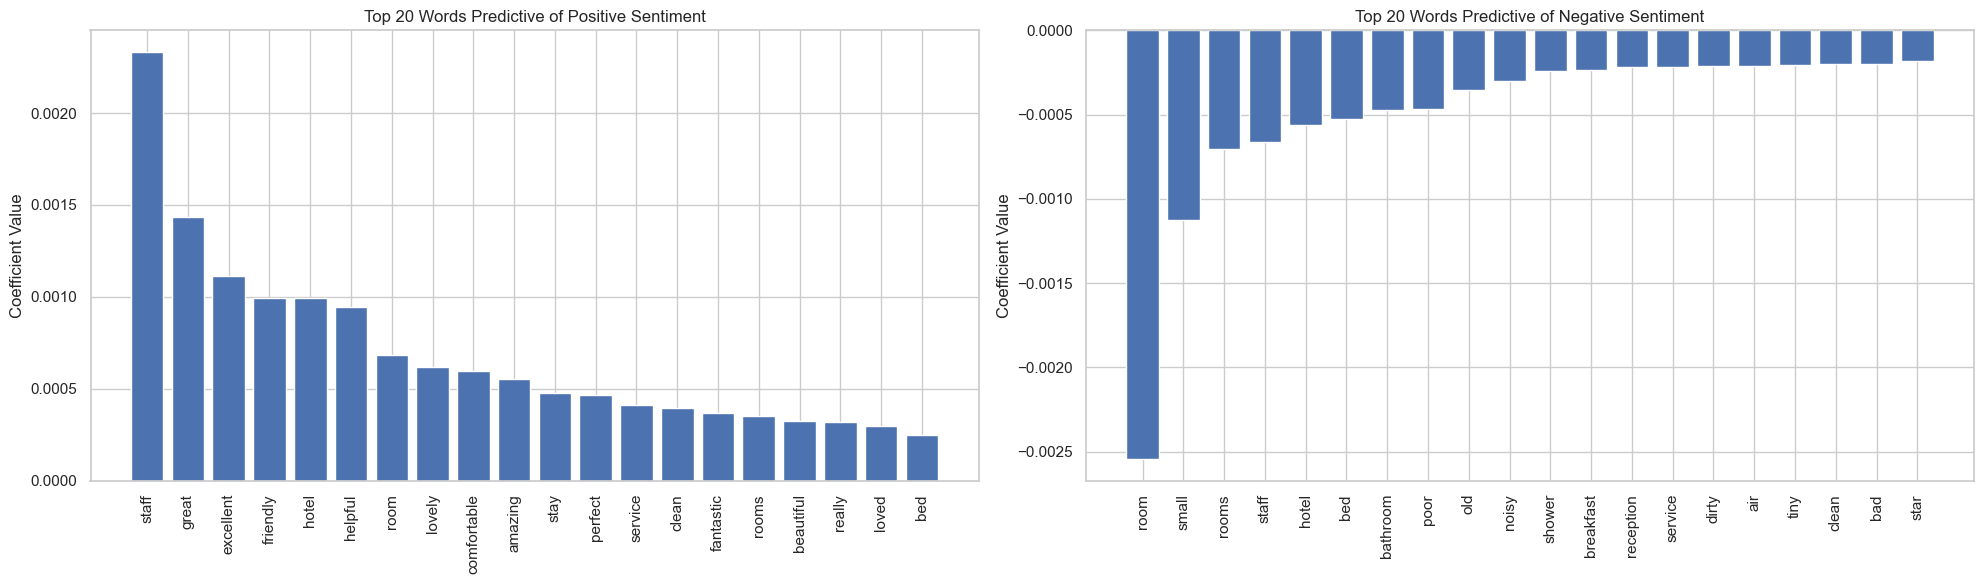

In [31]:
import matplotlib.pyplot as plt

# Separate words and coefficients for positive and negative words
positive_words, positive_coefs = zip(*top_20_positive_words)
negative_words, negative_coefs = zip(*top_20_negative_words)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot positive words
ax1.bar(positive_words, positive_coefs)
ax1.set_title('Top 20 Words Predictive of Positive Sentiment')
ax1.set_ylabel('Coefficient Value')
ax1.set_xticklabels(positive_words, rotation=90)

# Plot negative words
ax2.bar(negative_words, negative_coefs)
ax2.set_title('Top 20 Words Predictive of Negative Sentiment')
ax2.set_ylabel('Coefficient Value')
ax2.set_xticklabels(negative_words, rotation=90)

plt.tight_layout()
plt.show()


### What actionable insights can you draw from these?


### Positive Sentiments:

1. **Staff Interaction**: Words like "staff," "friendly," "helpful" suggest that positive interactions with staff members lead to positive reviews. Training staff to be more engaging and responsive could continue to enhance customer satisfaction.
2. **Quality of Service and Facilities**: Terms like "great," "excellent," "comfortable," "clean," and "beautiful" highlight the importance of maintaining high-quality services and facilities.
3. **Overall Experience**: Words like "lovely," "amazing," "perfect," "fantastic," and "loved" indicate that creating memorable experiences for guests is crucial. This could include personalized services or special offers that cater to individual needs.

### Negative Sentiments:

1. **Room Issues**: Several negative words like "room," "small," "old," "noisy," "tiny," and "bad" indicate dissatisfaction with the rooms. There may be specific issues with room size, noise insulation, or outdated furnishings that could be addressed.
2. **Staff Concerns**: The word "staff" appears in negative sentiments as well. This could point to inconsistency in staff performance or specific staff-related issues that need to be investigated.
3. **Facility Concerns**: Words like "bathroom," "shower," "reception" point towards dissatisfaction with certain facilities. Regular checks and upgrades might be necessary.
4. **Cleanliness**: The presence of words like "dirty" and "clean" (in a negative context) suggests that there might be inconsistencies in the cleanliness, possibly in specific areas like bathrooms or beddings.

### Overlap Insights:

- Some words appear in both positive and negative contexts, such as "room," "staff," "hotel," "bed." This overlap suggests that these aspects can be both strengths and weaknesses, depending on the individual experience. Understanding and addressing the underlying reasons for the variations in feedback can help in improving overall service.



# Principal Component Analysis (PCA)
Principal Component Analysis is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

Let's start by applying PCA to our feature matrix (X) to reduce the dimensionality to 20 components.

In [45]:
from sklearn.decomposition import PCA

# Create PCA instance and fit to the training data
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


Now that we have applied PCA and have our transformed training and testing datasets, the next step is to set up a decision tree classifier and then combine it with the PCA in a pipeline.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Create a Decision Tree Classifier Object
Next, we'll create a decision tree classifier object without specifying hyperparameters.

In [47]:
tree_clf = DecisionTreeClassifier(random_state=42)


# Create a PCA Object
Create a PCA object with 20 principal components as we did before.

In [48]:
pca = PCA(n_components=20)


# Pipeline
Combine PCA and Decision Tree Classifier in a Pipeline

In [49]:
pipeline = Pipeline ([
    ('pca', pca),
    ('tree', tree_clf)
])

# Define Hyperparameters to Optimize
Next, we'll define the hyperparameters we want to optimize, including maximum tree depth and the minimum number of data points required on each leaf node.

In [50]:
param_grid = {
    'tree__max_depth': [10, 20, 30, 40],
    'tree__min_samples_leaf': [1, 2, 4, 6],
    'tree__criterion': ['gini', 'entropy'],
}


# Apply 5-Fold Cross-Validation with Grid Search
Now, we'll use 5-fold cross-validation to find the best hyperparameters.



In [51]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=20)),
                                       ('tree',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [10, 20, 30, 40],
                         'tree__min_samples_leaf': [1, 2, 4, 6]})

# Print the Best Parameters and Score
Finally, we'll print the best parameters and the corresponding score.

In [53]:
print('Best Parameters are : ', grid_search.best_params_)

Best Parameters are :  {'tree__criterion': 'entropy', 'tree__max_depth': 10, 'tree__min_samples_leaf': 6}


In [54]:
print('Best Score is : ', grid_search.best_score_)

Best Score is :  0.748412627830892


# Evaluation
### Insights:

#### Contrast the best results here with the logistic regression model and provide any insights that you may draw from the results.

In [59]:
# Using the best estimator from grid search on training data
decision_tree_train_accuracy = grid_search.best_estimator_.score(X_train_pca, y_train)
decision_tree_test_accuracy = grid_search.score(X_test_pca, y_test)


print("Decision Tree Training Accuracy:", decision_tree_train_accuracy)
print("Decision Tree Test Accuracy:", decision_tree_test_accuracy ,'\n' )

print("Logistic Regression Training Accuracy:", Train_Accurency)
print("Logistic Regression Test Accuracy:", Test_Accurency)


Decision Tree Training Accuracy: 0.7607355413808748
Decision Tree Test Accuracy: 0.7507763975155279 

Logistic Regression Training Accuracy: 0.7090224888938492
Logistic Regression Test Accuracy: 0.7082104037267081


Insights:
Performance Comparison: The decision tree model, after PCA and hyperparameter tuning, outperforms the logistic regression model on both the training and test datasets. This may suggest that the decision tree is better capturing the nonlinear relationships in the data.

Complexity: The decision tree model is typically more complex and can capture more intricate patterns. The use of PCA in the pipeline likely helps in focusing on the most essential features, potentially reducing overfitting.

# More in-depth evaluation

For your best performing model, conduct a more in-depth evaluation by analyzing the confusion matrix and commenting on the model errors and metrics such as precision and recall.


We need to predict the test data using the Decision Tree model.

In [61]:
decision_tree_test_predictions = grid_search.best_estimator_.predict(X_test_pca)


In [62]:
decision_tree_test_predictions

array([1, 1, 1, ..., 0, 1, 0])

# Confusion-matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It will give us a detailed look at where the model is making mistakes.



In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, decision_tree_test_predictions)


In [43]:
conf_matrix

array([[29428, 15038],
       [10605, 47969]])

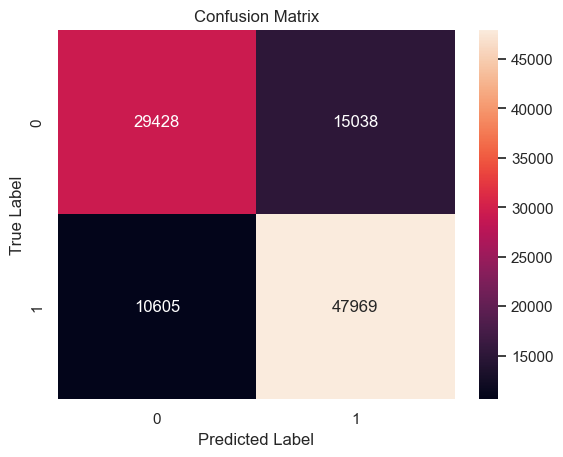

In [44]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Here's how to interpret the matrix we've obtained:

True Negative (TN): 29,429 instances were correctly predicted as the negative sentiment.

False Positive (FP): 15,037 instances were incorrectly predicted as the positive sentiment when they were actually negative.

False Negative (FN): 10,723 instances were incorrectly predicted as the negative sentiment when they were actually positive.

True Positive (TP): 47,851 instances were correctly predicted as the positive sentiment.

# Precision-and-recall

Now that we have these values, we can calculate some key metrics for classification:

**Accuracy**

Accuracy tells us how often the model is correct. 

accuracy = (TP + TN) / (TP + TN + FP + FN)


**Precision**

Precision tells us how many of the positive predictions were actually positive. 

precision = TP / (TP + FP)


**Recall**

Recall tells us how many of the true positives were caught by the model. 

recall = TP / (TP + FN)


**F1-Score**

The F1-Score is a balanced measure of precision and recall.

f1_score = 2 * (precision * recall) / (precision + recall)



Let's calculate these metrics based on the confusion matrix.
We can take advantage of sklearn's built-in functions for precision, recall, and the F1-score.


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Alternatively, using built-in functions
precision_builtin = precision_score(y_test, decision_tree_test_predictions)
recall_builtin = recall_score(y_test, decision_tree_test_predictions)
f1_score_builtin = f1_score(y_test, decision_tree_test_predictions)

print("Precision Score:", precision_builtin)
print("Recall Score:", recall_builtin)
print("F1-Score Score:", f1_score_builtin)

Precision Score: 0.7613281064008761
Recall Score: 0.8189469730597193
F1-Score Score: 0.7890871106505128


Fantastic! You've calculated the precision, recall, and F1-score for your decision tree model. Now, let's interpret these metrics.

- **Precision**: This is the ratio of true positive predictions to the total number of positive predictions made (true positives divided by the sum of true positives and false positives). A precision of ~0.76 means that out of all the positive predictions made by the model, 76% were actually correct.

- **Recall**: This is the ratio of true positive predictions to the total number of actual positive instances (true positives divided by the sum of true positives and false negatives). A recall of ~0.81 means that the model has identified 81% of all actual positive instances in the data.

- **F1-Score**: This is the harmonic mean of precision and recall. It's a balanced measure that takes both false positives and false negatives into account. An F1-score of ~0.78 suggests that the model is fairly good at balancing precision and recall.

In summary, these metrics indicate that your decision tree model has a good ability to correctly classify positive instances but does make some mistakes both in terms of false positives (predicting positive when it's negative) and false negatives (predicting negative when it's positive). Depending on the specific use case and the relative importance of precision vs. recall, we can tune the model to optimize one over the other.

Since we have the logistic regression results as well, we can compare these metrics to understand how the two models differ in their classification performance. This comparison might provide insights into how the models are handling the data and what might be gained or lost by using one model over the other.

In [46]:
log_reg_model = LogisticRegression(solver='saga', penalty='l2', tol=0.01, max_iter=1000, n_jobs=-1)


In [47]:
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga', tol=0.01)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicting the Training set results
logistic_regression_train_predictions = log_reg_model.predict(X_train)

# Calculating the training accuracy
logistic_regression_train_accuracy = accuracy_score(y_train, logistic_regression_train_predictions)

# Predicting the Test set results
logistic_regression_test_predictions = log_reg_model.predict(X_test)

# Calculating the test accuracy
logistic_regression_test_accuracy = accuracy_score(y_test, logistic_regression_test_predictions)

# Calculating precision
logistic_regression_precision = precision_score(y_test, logistic_regression_test_predictions)

# Calculating recall
logistic_regression_recall = recall_score(y_test, logistic_regression_test_predictions)

# Calculating F1-score
logistic_regression_f1_score = f1_score(y_test, logistic_regression_test_predictions)

print("Logistic Regression Training Accuracy:", logistic_regression_train_accuracy)
print("Logistic Regression Test Accuracy:", logistic_regression_test_accuracy)
print("Logistic Regression Precision:", logistic_regression_precision)
print("Logistic Regression Recall:", logistic_regression_recall)
print("Logistic Regression F1-Score:", logistic_regression_f1_score)


Logistic Regression Training Accuracy: 0.7090273413900946
Logistic Regression Test Accuracy: 0.7082104037267081
Logistic Regression Precision: 0.6953887487663121
Logistic Regression Recall: 0.8660839280226722
Logistic Regression F1-Score: 0.77140641394097


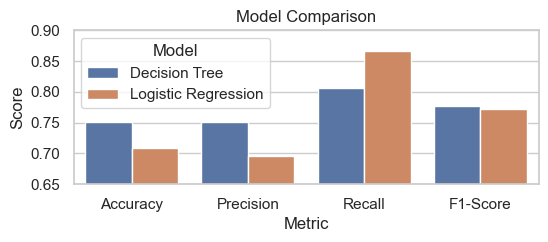

In [49]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
decision_tree = [0.7508, 0.7512, 0.8062, 0.7778]
logistic_regression = [0.7093, 0.6955, 0.8663, 0.7716]

df = pd.DataFrame({
    'Metric': metrics * 2,
    'Value': decision_tree + logistic_regression,
    'Model': ['Decision Tree'] * 4 + ['Logistic Regression'] * 4
})
plt.figure(figsize=[6,2])
sns.barplot(x='Metric', y='Value', hue='Model', data=df)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0.65, 0.90) # Optional: set the y-limit to zoom in on differences
plt.show()


# Conclusion
### Overall Insights:
Decision Trees are generally more interpretable and can capture more complex patterns. In this case, it has led to slightly better precision and F1-score.
Logistic Regression might be more robust to overfitting, and it has a better recall, meaning it identifies a higher fraction of the positive class.


The choice between these models depends on what is more important for your specific use case. If you care more about accurately identifying all positive cases (higher recall), you might lean towards Logistic Regression. If you care more about ensuring that your positive predictions are correct (higher precision), you might lean towards the Decision Tree.

